In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/DA/mxmh_survey_results (2).csv")

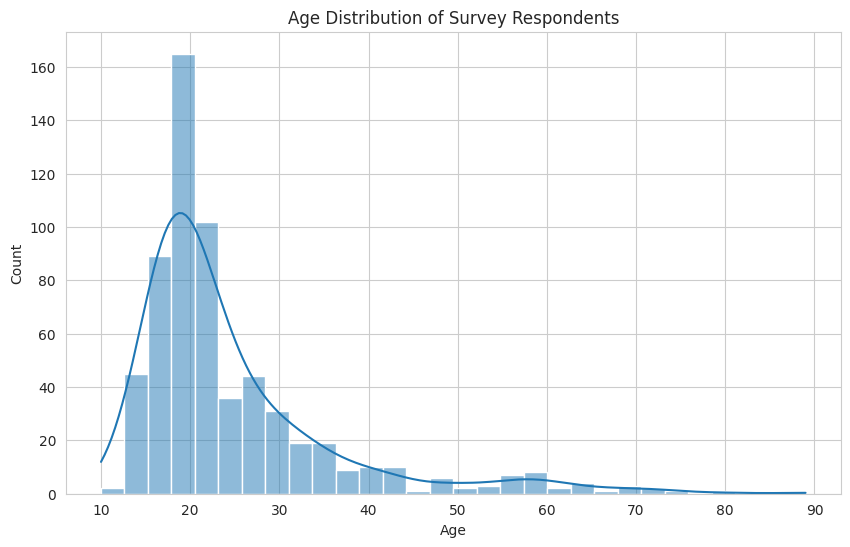

In [ ]:
# 1. Age Distribution of survey respondents

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

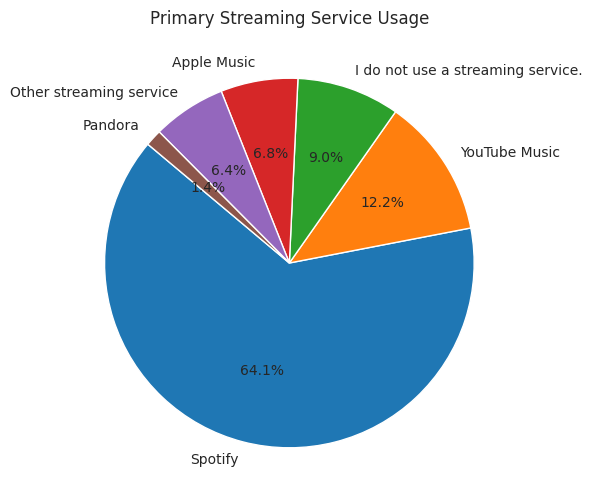

In [ ]:
#2.Primary Streaming Service Usage
streaming_services = data['Primary streaming service'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(streaming_services, labels=streaming_services.index, autopct='%1.1f%%', startangle=140)
plt.title('Primary Streaming Service Usage')
plt.show()

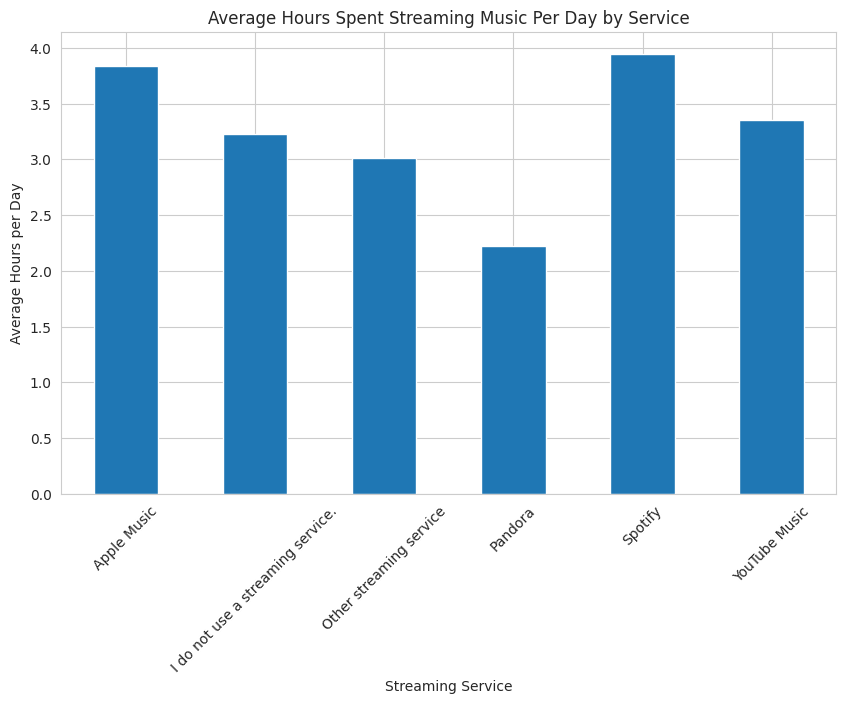

In [ ]:
#3. Hours Spent Streaming Music Per Day
avg_hours_by_service = data.groupby('Primary streaming service')['Hours per day'].mean()
plt.figure(figsize=(10, 6))
avg_hours_by_service.plot(kind='bar')
plt.title('Average Hours Spent Streaming Music Per Day by Service')
plt.xlabel('Streaming Service')
plt.ylabel('Average Hours per Day')
plt.xticks(rotation=45)
plt.show()

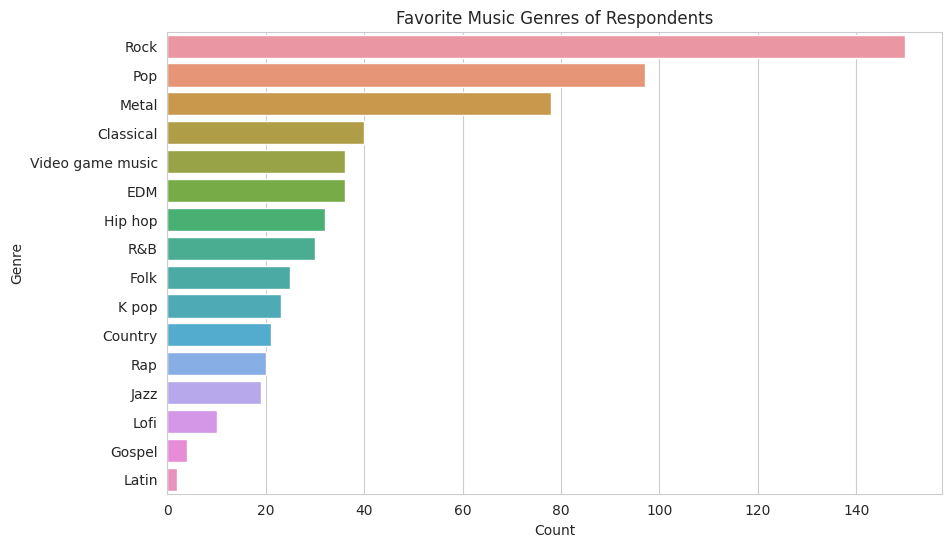

In [ ]:
#4.Favourite music genres preferences
fav_genres = data['Fav genre'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genres.values, y=fav_genres.index)
plt.title('Favorite Music Genres of Respondents')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Descriptive Statistics for Numerical Variables
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_stats = data[numerical_columns].describe()

# Descriptive Statistics for Categorical Variables
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_stats = data[categorical_columns].describe()

numerical_stats, categorical_stats

(              Age  Hours per day         BPM     Anxiety  Depression  \
 count  623.000000     623.000000  623.000000  623.000000  623.000000   
 mean    24.744783       3.717817  123.425361    5.890048    4.895666   
 std     11.623544       3.095196   39.472370    2.761913    3.000460   
 min     10.000000       0.000000    0.000000    0.000000    0.000000   
 25%     18.000000       2.000000  100.000000    4.000000    2.000000   
 50%     21.000000       3.000000  120.000000    6.000000    5.000000   
 75%     27.000000       5.000000  144.000000    8.000000    7.000000   
 max     89.000000      24.000000  624.000000   10.000000   10.000000   
 
          Insomnia         OCD  
 count  623.000000  623.000000  
 mean     3.827448    2.666132  
 std      3.115850    2.855878  
 min      0.000000    0.000000  
 25%      1.000000    0.000000  
 50%      3.000000    2.000000  
 75%      6.000000    5.000000  
 max     10.000000   10.000000  ,
             Timestamp Primary streaming se

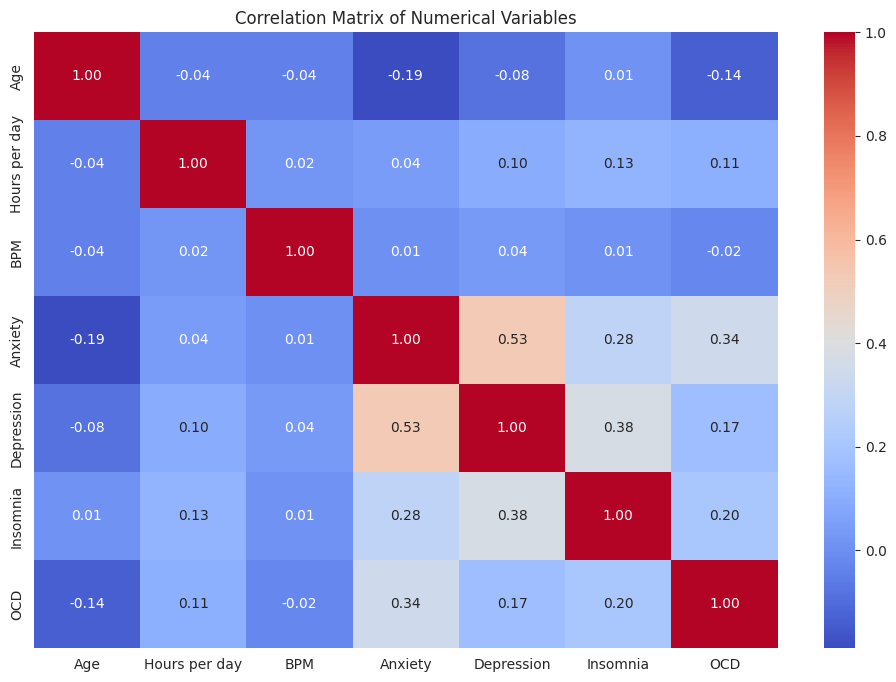

(1.9177025293388748,
 0.055607114056265006,
 2.707917817512938,
 0.006957136610255034)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Correlation Analysis
correlation_matrix = data[numerical_columns].corr()

# Visualization of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Hypothesis Testing
# Splitting the dataset into two groups based on average hours per day
average_hours = data['Hours per day'].mean()
group_above_average = data[data['Hours per day'] > average_hours]
group_below_average = data[data['Hours per day'] <= average_hours]

# T-test for Anxiety
t_stat_anxiety, p_val_anxiety = ttest_ind(group_above_average['Anxiety'], group_below_average['Anxiety'])

# T-test for Depression
t_stat_depression, p_val_depression = ttest_ind(group_above_average['Depression'], group_below_average['Depression'])

t_stat_anxiety, p_val_anxiety, t_stat_depression, p_val_depression
